In [1]:
import os
# import drjit
gpu_num = 0 # Use "" to use the CPU
os.environ["CUDA_VISIBLE_DEVICES"] = f"{gpu_num}"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import sionna
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)
tf.get_logger().setLevel('ERROR')

from jammer.simulation_model import *
from jammer.utils import *
import jammer.simulation_model as sim
from tensorflow.python.keras.losses import MeanAbsoluteError, MeanSquaredError, BinaryCrossentropy


In [2]:
# common parameters
model_parameters = {}
jammer_parameters = {}
model_parameters["perfect_csi"] = False
model_parameters["num_ut"] = 2
model_parameters["num_ut_ant"] = 2
model_parameters["jammer_present"] = True
model_parameters["jammer_power"] = db_to_linear(-3)
# model_parameters["jammer_mitigation"] = "pos"
# model_parameters["jammer_mitigation_dimensionality"] = 1
model_parameters["num_silent_pilot_symbols"] = 4
model_parameters["jammer_parameters"] = jammer_parameters

sim.BATCH_SIZE = 8
sim.MAX_MC_ITER = 400
# sim.MAX_MC_ITER = 30

def experiment(title):
    ber_plots.reset()
    # name, mash, jammer_present, jammer_mitigation
    parameters = [
        ("No Jammer", False, False, None),
        ("No Jammer, MASH", True, False, None),
        ("Jammer", False, True, None),
        ("Jammer, MASH", True, True, None),
        ("Jammer mitigated", False, True, "pos"),
        ("Jammer mitigated, MASH", True, True, "pos"),
    ]
    for name, mash, jammer_present, jammer_mitigation in parameters:
        model = Model(**{**model_parameters, "mash": mash,
                         "jammer_present": jammer_present,
                         "jammer_mitigation": jammer_mitigation})
        simulate_model(model, name)
    ber_plots.title = title
    ber_plots()

EbNo [dB] |        BER |       BLER |  bit errors |    num bits | block errors |  num blocks | runtime [s] |    status
---------------------------------------------------------------------------------------------------------------------------------------
     -5.0 | 2.3124e-02 | 1.0000e+00 |      454631 |    19660800 |         3200 |        3200 |        11.2 |reached max iter       
   -3.667 | 9.4611e-03 | 1.0000e+00 |      186013 |    19660800 |         3200 |        3200 |         8.7 |reached max iter       
   -2.333 | 3.0043e-03 | 1.0000e+00 |       59067 |    19660800 |         3200 |        3200 |         8.8 |reached max iter       
     -1.0 | 7.3700e-04 | 9.1375e-01 |       14490 |    19660800 |         2924 |        3200 |         8.8 |reached max iter       
    0.333 | 1.1892e-04 | 3.8562e-01 |        2338 |    19660800 |         1234 |        3200 |         8.8 |reached max iter       
    1.667 | 1.3580e-05 | 6.4375e-02 |         267 |    19660800 |          206 |     

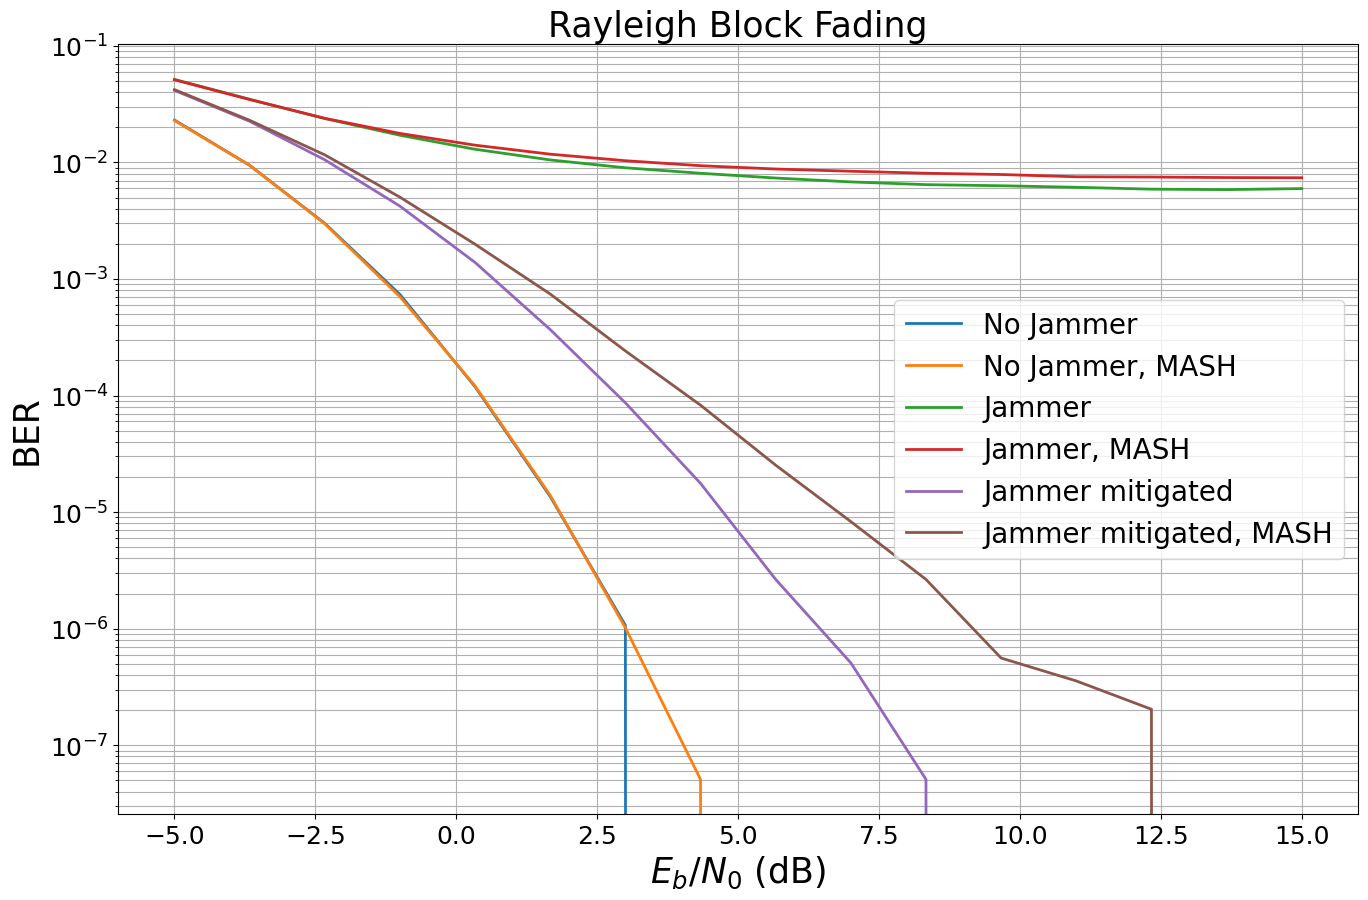

In [3]:
model_parameters["scenario"] = "rayleigh"
experiment("Rayleigh Block Fading")

EbNo [dB] |        BER |       BLER |  bit errors |    num bits | block errors |  num blocks | runtime [s] |    status
---------------------------------------------------------------------------------------------------------------------------------------
     -5.0 | 3.3515e-02 | 1.0000e+00 |      247099 |     7372800 |         3200 |        3200 |         9.3 |reached max iter       
   -3.667 | 1.0961e-02 | 1.0000e+00 |       80814 |     7372800 |         3200 |        3200 |         8.8 |reached max iter       
   -2.333 | 2.2979e-03 | 9.8844e-01 |       16942 |     7372800 |         3163 |        3200 |         8.7 |reached max iter       
     -1.0 | 2.6516e-04 | 4.4500e-01 |        1955 |     7372800 |         1424 |        3200 |         8.8 |reached max iter       
    0.333 | 1.1664e-05 | 2.6875e-02 |          86 |     7372800 |           86 |        3200 |         8.8 |reached max iter       
    1.667 | 2.7127e-07 | 6.2500e-04 |           2 |     7372800 |            2 |     

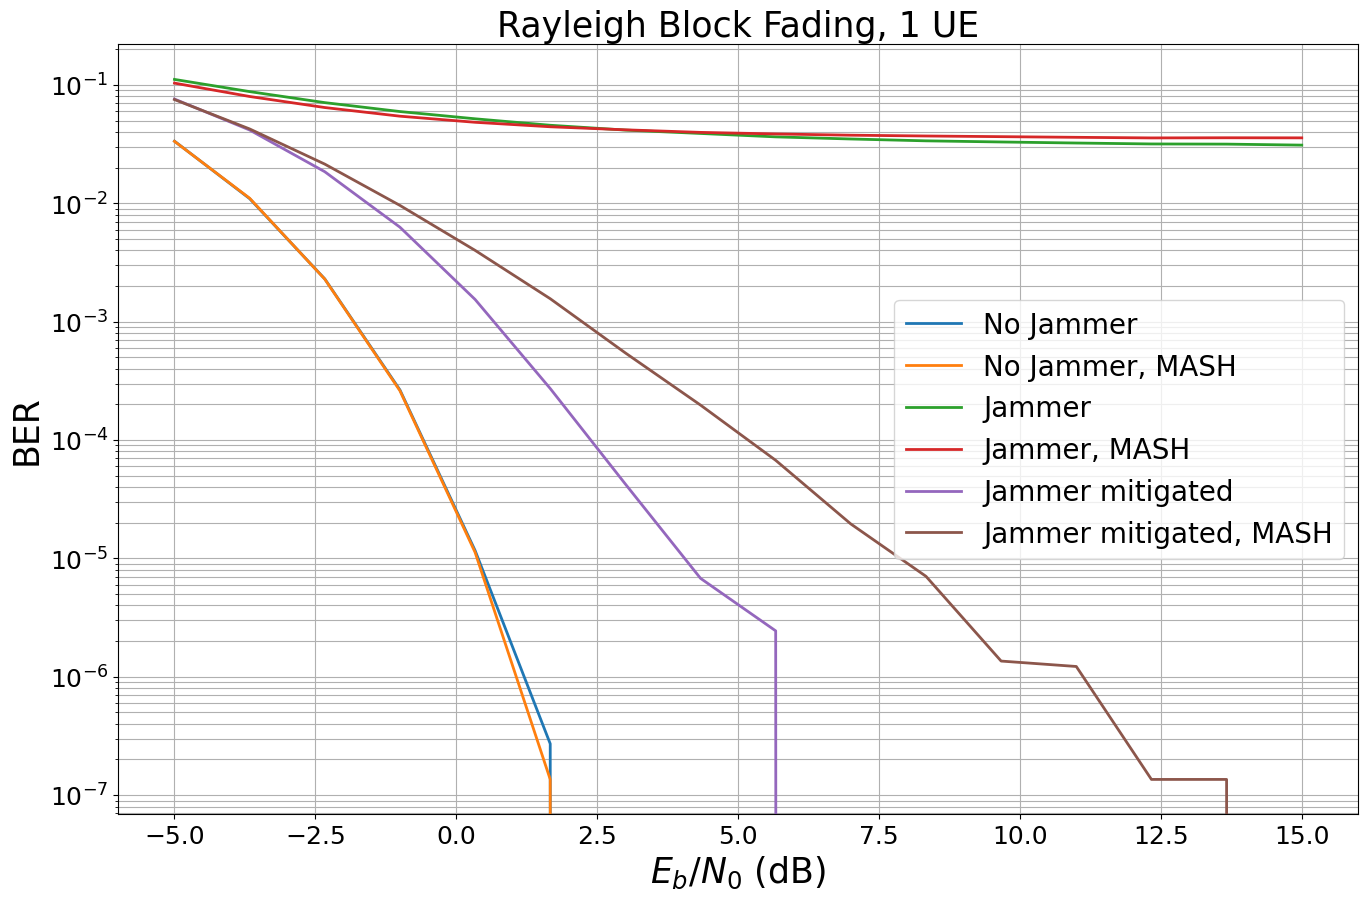

In [5]:
model_parameters["scenario"] = "rayleigh"
model_parameters["num_ut"] = 1
model_parameters["num_ut_ant"] = 1
experiment("Rayleigh Block Fading, 1 UE")

EbNo [dB] |        BER |       BLER |  bit errors |    num bits | block errors |  num blocks | runtime [s] |    status
---------------------------------------------------------------------------------------------------------------------------------------
     -5.0 | 9.7114e-02 | 1.0000e+00 |     1909346 |    19660800 |         3200 |        3200 |        21.4 |reached max iter       
   -3.667 | 7.3284e-02 | 1.0000e+00 |     1440829 |    19660800 |         3200 |        3200 |        13.9 |reached max iter       
   -2.333 | 5.5361e-02 | 1.0000e+00 |     1088435 |    19660800 |         3200 |        3200 |        13.8 |reached max iter       
     -1.0 | 4.3140e-02 | 9.9906e-01 |      848161 |    19660800 |         3197 |        3200 |        13.9 |reached max iter       
    0.333 | 3.1273e-02 | 9.8938e-01 |      614860 |    19660800 |         3166 |        3200 |        13.8 |reached max iter       
    1.667 | 2.5120e-02 | 9.2531e-01 |      493885 |    19660800 |         2961 |     

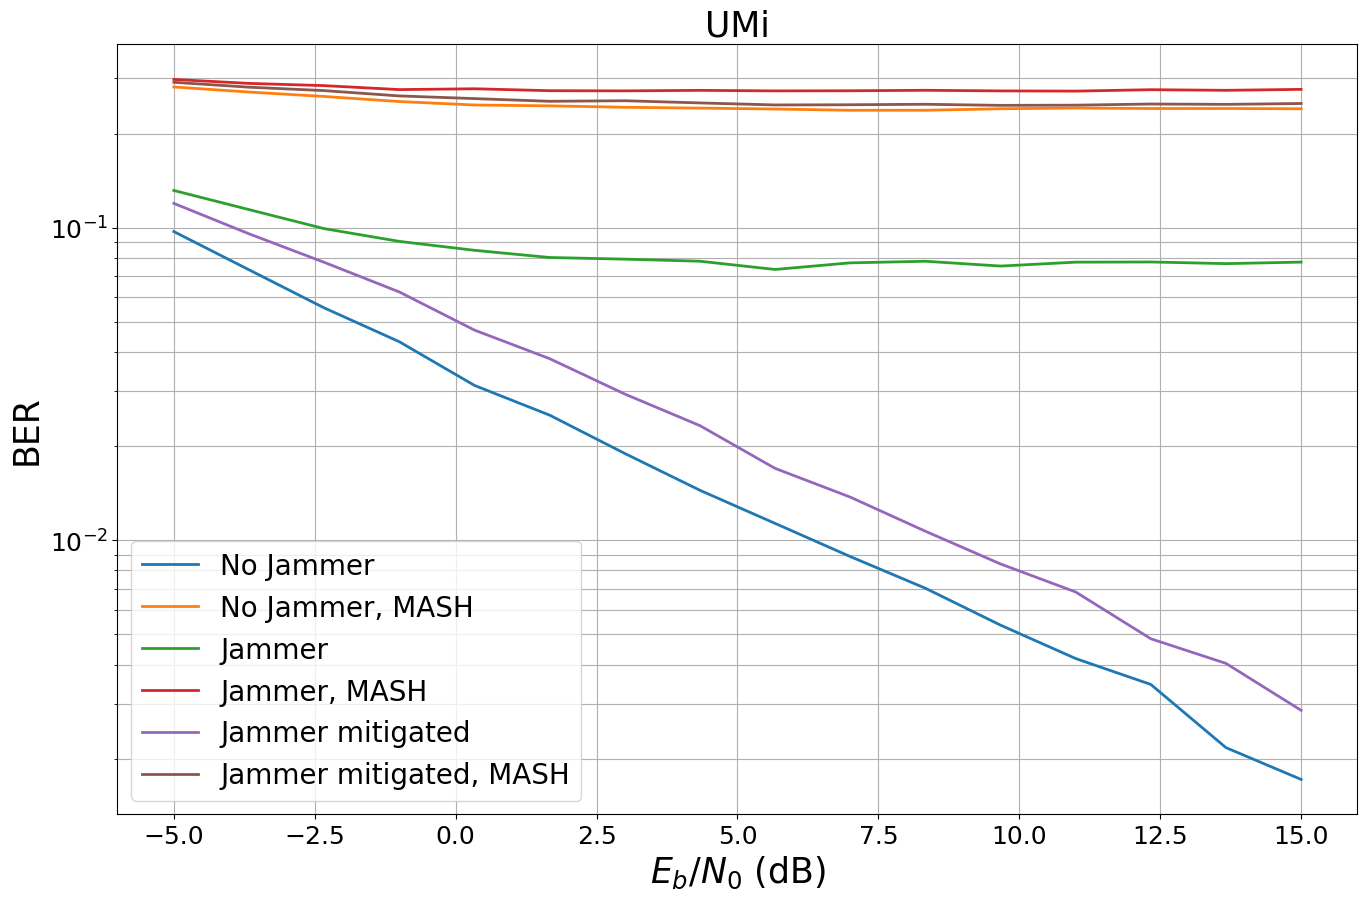

In [4]:
model_parameters["scenario"] = "umi"
model_parameters["num_ut"] = 2
model_parameters["num_ut_ant"] = 2
experiment("UMi")

EbNo [dB] |        BER |       BLER |  bit errors |    num bits | block errors |  num blocks | runtime [s] |    status
---------------------------------------------------------------------------------------------------------------------------------------
     -5.0 | 4.0253e-02 | 1.0000e+00 |      296777 |     7372800 |         3200 |        3200 |        16.9 |reached max iter       
   -3.667 | 1.6013e-02 | 1.0000e+00 |      118060 |     7372800 |         3200 |        3200 |        13.9 |reached max iter       
   -2.333 | 5.0967e-03 | 9.9687e-01 |       37577 |     7372800 |         3190 |        3200 |        13.9 |reached max iter       
     -1.0 | 1.2912e-03 | 6.8531e-01 |        9520 |     7372800 |         2193 |        3200 |        13.9 |reached max iter       
    0.333 | 3.0260e-04 | 2.2375e-01 |        2231 |     7372800 |          716 |        3200 |        13.8 |reached max iter       
    1.667 | 7.9210e-05 | 6.2812e-02 |         584 |     7372800 |          201 |     

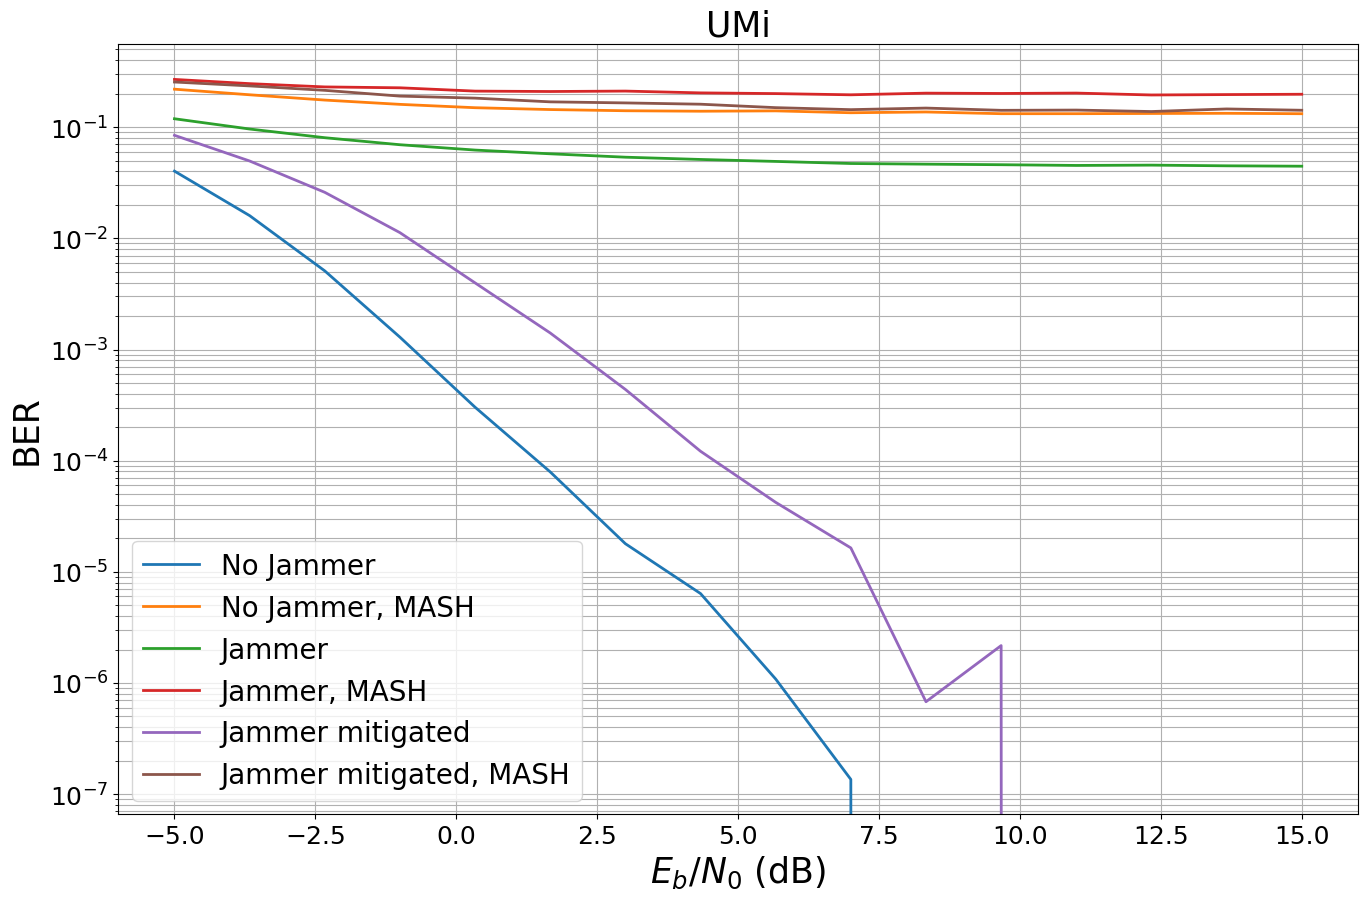

In [6]:
model_parameters["scenario"] = "umi"
model_parameters["num_ut"] = 1
model_parameters["num_ut_ant"] = 1
experiment("UMi")